## Testes e IC 1 - Respondendo a pergunta 1 (influência do gênero)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
plt.rcParams['axes.labelsize']  = 18
plt.rcParams['axes.titlesize']  = 18
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 3
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (20,7.5)

In [3]:
df_with_one_hot = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

df_with_genre_list = pd.read_csv('../dataset/songs_with_genre.csv',
                 encoding='iso-8859-1', na_values='unknown')

relevant_genres = pd.read_csv('../dataset/genres_relevant.csv',
                 encoding='iso-8859-1', na_values='unknown')

In [4]:
df_with_genre_list['mode']

0       1.0
1       0.0
2       1.0
3       0.0
4       1.0
5       1.0
6       0.0
7       1.0
8       0.0
9       0.0
10      0.0
11      1.0
12      1.0
13      0.0
14      0.0
15      1.0
16      0.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      0.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      0.0
       ... 
6980    1.0
6981    0.0
6982    0.0
6983    1.0
6984    1.0
6985    0.0
6986    1.0
6987    1.0
6988    1.0
6989    1.0
6990    1.0
6991    1.0
6992    0.0
6993    0.0
6994    1.0
6995    0.0
6996    1.0
6997    1.0
6998    1.0
6999    0.0
7000    1.0
7001    1.0
7002    0.0
7003    1.0
7004    0.0
7005    1.0
7006    0.0
7007    1.0
7008    1.0
7009    1.0
Name: mode, Length: 7010, dtype: float64

In [5]:
#agrupa por gênero para tirar estatísticas
def group_by_genre(relevant_genres, df_genre_rank):    
    genre_stats = {}
    for i in range(relevant_genres.shape[0]):
        genres = relevant_genres.iloc[i]['genre']
        df_genres = df_genre_rank[['peak_pos', 'weeks', 'rank', genres]]
        group_genre = df_genres[df_genres[genres] == 1]
        group_genre = group_genre.mean()[['peak_pos', 'weeks', 'rank']]
        
        genre_stats[genres] = group_genre

    return pd.DataFrame.from_dict(genre_stats, orient='index')

In [6]:
genre_stats = group_by_genre(relevant_genres, df_with_one_hot)
genre_stats

,peak_pos,weeks,rank
contemporary country,50.299505,15.967822,82.117987
country,49.975221,16.169912,82.679646
country road,50.584699,16.113843,82.539162
dance pop,40.780886,14.259518,72.769619
hip hop,46.874513,12.737334,77.037412
hip pop,40.401075,16.301075,75.610753
pop,43.577250,13.594567,72.752801
pop rap,44.524171,14.124171,75.250237
post-teen pop,42.266711,12.546123,71.719920
r&b,39.548160,16.174628,74.144871


In [7]:
def bootstrap(df, n = 10000):
    size = len(df)
    values = []
    
    for i in range(n):
        sample = df_with_one_hot.sample(size, replace=True)
        values.append(group_by_genre(relevant_genres, sample)['peak_pos'])
    return values

In [8]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [9]:
bootstrap_result = pd.DataFrame(bootstrap(df_with_one_hot ,1000))
bootstrap_result

,contemporary country,country,country road,dance pop,hip hop,hip pop,pop,pop rap,post-teen pop,r&b,rap,southern hip hop,trap music,urban contemporary
peak_pos,50.839017,50.744881,51.100877,41.266720,47.670195,40.992457,44.246276,44.966781,42.562834,40.590909,48.113095,48.803099,53.109878,40.252505
peak_pos,50.327724,49.668107,50.612046,40.759539,48.690980,42.132337,44.047244,45.981273,43.041610,40.752514,48.429880,50.079208,53.650759,41.776803
peak_pos,49.807508,49.796596,50.209241,40.795491,45.630040,40.609914,43.125346,43.651965,42.207407,40.673046,46.209128,47.933817,50.853392,40.136959
peak_pos,50.972772,50.432769,51.312900,41.988584,46.699306,40.308824,44.766922,44.969824,43.665580,40.113297,47.579727,49.336473,51.907121,40.240157
peak_pos,51.553366,51.293134,51.884826,40.086501,45.775781,39.914439,42.811115,43.847601,42.367527,37.976245,46.682135,48.810981,52.128649,37.526116
peak_pos,49.615200,49.075278,49.723292,40.949721,47.413820,41.613762,43.764259,45.548402,43.000689,40.736924,47.926013,49.635063,52.855460,41.058765
peak_pos,50.028099,50.013158,50.826244,39.730458,47.120219,40.227848,43.173456,44.913917,40.570742,39.545310,48.590935,48.964476,52.673751,40.200418
peak_pos,49.520131,49.215617,49.668825,41.969181,48.099845,39.579247,44.649342,45.540528,42.566934,39.763353,48.415313,48.759615,53.514862,39.270355
peak_pos,49.338462,49.135813,49.964190,41.348828,47.721429,39.850377,44.170094,44.944937,43.109912,39.603125,48.317708,48.848818,53.288639,39.093812
peak_pos,49.881870,49.601942,49.986425,40.892118,47.026596,41.126984,43.628793,44.956218,42.364912,40.296176,47.473265,48.932384,52.649619,40.613237


In [10]:
bootstrap_result = bootstrap_result.reindex(bootstrap_result.mean().sort_values().index, axis=1)

In [11]:
result_copy = bootstrap_result.copy()
averages = result_copy.mean()
averages_sorted = averages.sort_values()

In [12]:
real_peak_pos = {"a" : 40}
keys = averages_sorted.keys()
for i in range(len(averages_sorted)):
    for j in genre_stats.index:
        if j == keys[i]:
            real_peak_pos[keys[i]] = genre_stats.get_value(j, col='peak_pos')

real_peak_pos = pd.Series(real_peak_pos)
real_peak_pos

C:\Users\Luiz\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


a                       40.000000
r&b                     39.548160
urban contemporary      39.831349
hip pop                 40.401075
dance pop               40.780886
post-teen pop           42.266711
pop                     43.577250
pop rap                 44.524171
hip hop                 46.874513
rap                     47.384348
southern hip hop        48.575972
country                 49.975221
contemporary country    50.299505
country road            50.584699
trap music              52.410423
dtype: float64

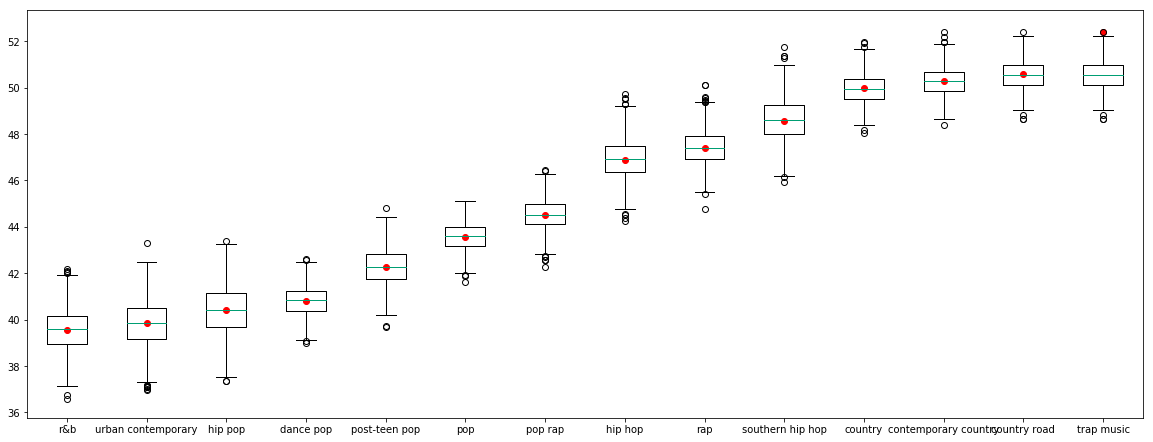

In [13]:
cols = bootstrap_result.columns

plt.boxplot([bootstrap_result[cols[0]], bootstrap_result[cols[1]], bootstrap_result[cols[2]],
            bootstrap_result[cols[3]], bootstrap_result[cols[4]], bootstrap_result[cols[5]],
            bootstrap_result[cols[6]], bootstrap_result[cols[7]], bootstrap_result[cols[8]],
            bootstrap_result[cols[9]], bootstrap_result[cols[10]], bootstrap_result[cols[11]],
            bootstrap_result[cols[12]], bootstrap_result[cols[12]]], 
           labels=cols)
plt.scatter(y=real_peak_pos.values, x=real_peak_pos.keys(), color='red')
plt.show()



In [14]:
bootstrap_top5 = bootstrap_result.loc[:, real_peak_pos.index[1:6]]
bootstrap_bottom5 = bootstrap_result.loc[:, real_peak_pos.index[-5:]]
bootstrap_top5

,r&b,urban contemporary,hip pop,dance pop,post-teen pop
peak_pos,40.590909,40.252505,40.992457,41.266720,42.562834
peak_pos,40.752514,41.776803,42.132337,40.759539,43.041610
peak_pos,40.673046,40.136959,40.609914,40.795491,42.207407
peak_pos,40.113297,40.240157,40.308824,41.988584,43.665580
peak_pos,37.976245,37.526116,39.914439,40.086501,42.367527
peak_pos,40.736924,41.058765,41.613762,40.949721,43.000689
peak_pos,39.545310,40.200418,40.227848,39.730458,40.570742
peak_pos,39.763353,39.270355,39.579247,41.969181,42.566934
peak_pos,39.603125,39.093812,39.850377,41.348828,43.109912
peak_pos,40.296176,40.613237,41.126984,40.892118,42.364912


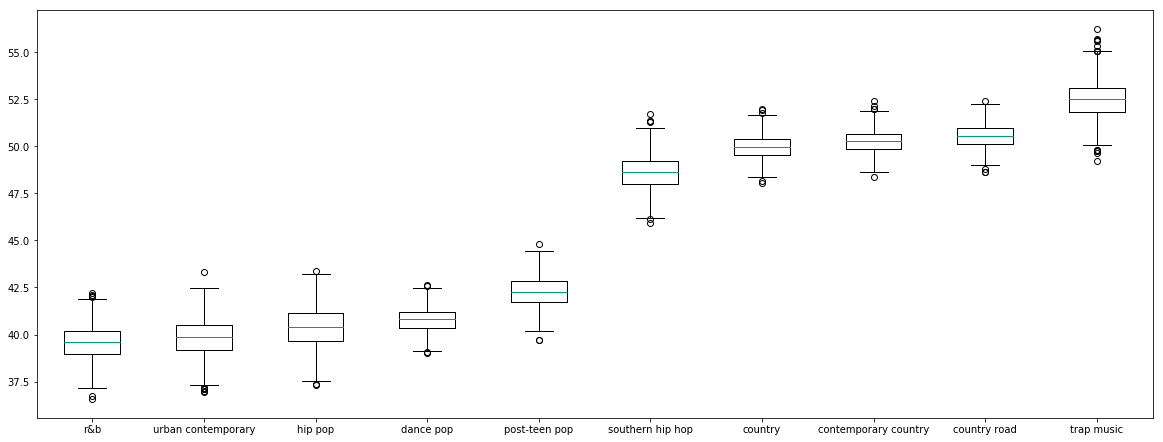

In [15]:
top5cols = bootstrap_top5.columns
bottom5cols = bootstrap_bottom5.columns
plt.boxplot([bootstrap_top5[top5cols[0]], bootstrap_top5[top5cols[1]], 
             bootstrap_top5[top5cols[2]], bootstrap_top5[top5cols[3]], bootstrap_top5[top5cols[4]], 
            bootstrap_bottom5[bottom5cols[0]], bootstrap_bottom5[bottom5cols[1]], 
             bootstrap_bottom5[bottom5cols[2]], bootstrap_bottom5[bottom5cols[3]], bootstrap_bottom5[bottom5cols[4]]], 
            labels=[top5cols[0], top5cols[1], top5cols[2], top5cols[3], top5cols[4],
                    bottom5cols[0], bottom5cols[1], bottom5cols[2], bottom5cols[3], bottom5cols[4]])

plt.show()

Olhando os resultados encontrados no boxplot a partir do bootstrap, percebemos que todas as médias estão no IC encontrado, logo não é possível rejeitar a hipótese nula. Ou seja, não é possível concluir que o gênero, por si só, impacta o potencial da música no top 100 da billboard.<br>

Contudo, olhando o segundo boxplot, que compara os cinco gêneros com maior média no peak_pos e os cinco gêneros com menor média no peak_pos, percebemos que os ICs não se cruzam, e, portanto, o fator gênero possui importância para determinar o quão alto a música vai no top 100, indicando que alguns gêneros(no exemplo, r&b, urban contemporary, dance pop, hip pop e post-teen pop, que tiveram as melhores médias da base) têm uma chance maior de alcançar posições mais altas.

## Testes e IC 2 - Respondendo a pergunta 2 (atributos padrão)

In [16]:
df = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

Filtraremos os dados em dois grandes grupos: músicas que já atingiram o top 10 (peak_pos <= 10), e músicas que nunca atingiram o top 10 (peak_pos > 10).

In [17]:
top_10_songs = df[df['peak_pos'] <= 10]
top_10_songs.describe()

,peak_pos,pop,dance pop,pop rap,rap,post-teen pop,hip hop,r&b,contemporary country,southern hip hop,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,...,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000,1057.000000
mean,4.689688,0.596026,0.591296,0.402081,0.278146,0.315989,0.218543,0.315043,0.018921,0.175024,...,0.113852,0.137331,0.010689,3.994324,0.668859,5.103122,237962.465468,-5.775912,0.560820,0.603595
std,2.998771,0.490925,0.491827,0.490550,0.448298,0.465128,0.413453,0.464753,0.136312,0.380167,...,0.107339,0.180935,0.079633,0.226062,0.140930,3.602629,43520.973098,2.135248,0.221864,0.489382
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.024100,0.000046,0.000000,0.000000,0.160000,0.000000,124056.000000,-18.228000,0.038800,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.040300,0.015900,0.000000,4.000000,0.583000,1.000000,212107.000000,-6.814000,0.389000,0.000000
50%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.067700,0.058700,0.000000,4.000000,0.680000,5.000000,231653.000000,-5.519000,0.578000,1.000000
75%,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.147000,0.197000,0.000019,4.000000,0.763000,8.000000,257133.000000,-4.321000,0.743000,1.000000
max,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.681000,0.966000,0.926000,5.000000,0.973000,11.000000,688453.000000,-1.097000,0.975000,1.000000


In [18]:
non_top_10_songs = df[df['peak_pos'] > 10]
non_top_10_songs.describe()

,peak_pos,pop,dance pop,pop rap,rap,post-teen pop,hip hop,r&b,contemporary country,southern hip hop,...,speechiness,acousticness,instrumentalness,time_signature,danceability,key,duration_ms,loudness,valence,mode
count,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,...,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000,5953.000000
mean,55.512683,0.388880,0.327398,0.283051,0.240383,0.195196,0.176718,0.158576,0.200235,0.159079,...,0.102201,0.170560,0.013434,3.970771,0.616812,5.277843,230860.169998,-5.950940,0.510824,0.686881
std,25.969033,0.487537,0.469303,0.450519,0.427352,0.396385,0.381462,0.365310,0.400210,0.365781,...,0.104638,0.215192,0.089911,0.274631,0.147603,3.583313,44699.094237,2.362978,0.223682,0.463801
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022500,0.000001,0.000000,1.000000,0.113000,0.000000,37067.000000,-22.015000,0.033200,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.035200,0.017200,0.000000,4.000000,0.515000,2.000000,203573.000000,-7.080000,0.332000,0.000000
50%,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.053100,0.077100,0.000000,4.000000,0.618000,6.000000,226200.000000,-5.571000,0.508000,1.000000
75%,78.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.125000,0.245000,0.000021,4.000000,0.720000,8.000000,252800.000000,-4.333000,0.682000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.930000,0.995000,0.982000,5.000000,0.986000,11.000000,721580.000000,-0.320000,0.977000,1.000000


# Testes de Hipóteses

Nos testes de hipóteses, tentaremos descobrir a "cara" das músicas que atingem o top 10 da Billboard, no que diz respeito às features do Spotify. Ou seja: será que as músicas que chegam no top 10 da Billborad tem um danceability alto? Será que elas tem um mode baixo? Será que elas possuem uma valencia alta?

In [19]:
spotify_features = list(df.columns[22:])
spotify_features.remove('duration_ms')
spotify_features.remove('time_signature')
spotify_features

['energy',
 'liveness',
 'tempo',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'danceability',
 'key',
 'loudness',
 'valence',
 'mode']

Para isso, vamos basear os nossos testes de hipóteses em testes de permutação.

Inicialmente, iremos criar uma coluna auxiliar no nosso dataset, que indicará se a música já atingiu ou não o top 10. Faremos isso pra facilitar o filtro durante o teste de permutação.

In [20]:
df['reached_top_10'] = df['peak_pos'] <= 10

Abaixo, criamos algumas funções auxiliares, para facilitar o trabalho.

In [21]:
def shuffle(feature):
    return feature.sample(frac=1, replace=False).reset_index(drop=True)

def plot_groups_histogram(feature_name):
    sns.distplot(non_top_10_songs[feature_name], kde=True, color='r', hist_kws=dict(alpha=0.3))
    sns.distplot(top_10_songs[feature_name], kde=True, hist_kws=dict(alpha=0.3))
    plt.legend(['Non-top10', 'Top10'])
    plt.ylabel('Porcentagem de amostras')
    plt.xlabel('{}'.format(feature_name))
    plt.show()

def plot_permutation_vs_observed(perm_difference, observed_difference):
    figure(figsize=(14,7))
    plt.hist(perm_difference, bins=30, edgecolor='k', color='grey')
    plt.vlines(observed_difference, ymin=0, ymax=600, color='red')
    plt.legend(['Observed mean difference', 'Mean difference distribution from permutation test'])
    plt.ylabel('Numero de Amostras')
    plt.xlabel('Diferença das médias')
    plt.show()
    
def calculate_p_value(perm_difference, observed_difference, n_iter=5000):
    if observed_difference > 0:
        return np.count_nonzero(perm_difference > observed_difference) / n_iter
    else:
        return np.count_nonzero(perm_difference <= observed_difference) / n_iter

Agora criaremos uma função que fará o teste de permutação de uma feature recebida por parâmetro.

In [22]:
def mean_difference_permutation_test(feature_name, n = 5000):
    filtro = df['reached_top_10'] == True
    differences = np.array([])
    for _ in range(n):
        np.random.shuffle(filtro.values)
        diff = df[filtro][feature_name].mean() - df[~filtro][feature_name].mean()
        differences = np.append(differences, diff)
    return differences

Por fim, definiremos uma função que receberá o nome de uma feature, e fará todo o processo do teste de hipótese:
    1. Plotará o histograma de densidade da feature, com 30 bins, para os dois grupos (top10 vs nontop10);
    2. Calculará a diferença da média observada entre os dois grupos;
    3. Computará o teste de permutação da diferença;
    4. Plotará o histograma das diferenças, juntamente com a diferença observada;
    5. Calculará o p-valor.
   
Com isso, poderemos facilmente fazer vários testes de hipóteses, tentando entender quais features podem influenciar uma música a chegar no top10. Iremos considerar o limiar de p-valor como **0.05**, para efeitos de rejeição da hipótese nula.

In [23]:
def permutation_test_for_feature(feature_name):
    plot_groups_histogram(feature_name)
    observed_diff = top_10_songs[feature_name].mean() - non_top_10_songs[feature_name].mean()
    print("Diferença observada entre as médias de {}: {}".format(feature_name, observed_diff))
    perm_diff = mean_difference_permutation_test(feature_name, n = 5000)
    plot_permutation_vs_observed(perm_diff, observed_diff)
    p_val = calculate_p_value(perm_diff, observed_diff, 5000)
    print("P-valor do teste: {}".format(p_val))
    return (feature_name, observed_diff, p_val, p_val < 0.05)

Com essas ferramentas, podemos partir para os testes de hipóteses!

Iremos armazenar os dados de cada execução num vetor, para construir uma tabela resumindo os resultados obtidos.

In [24]:
results = []

## Teste de Hipótese - Energy
### H0: na população, a distribuição do atributo "energy" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

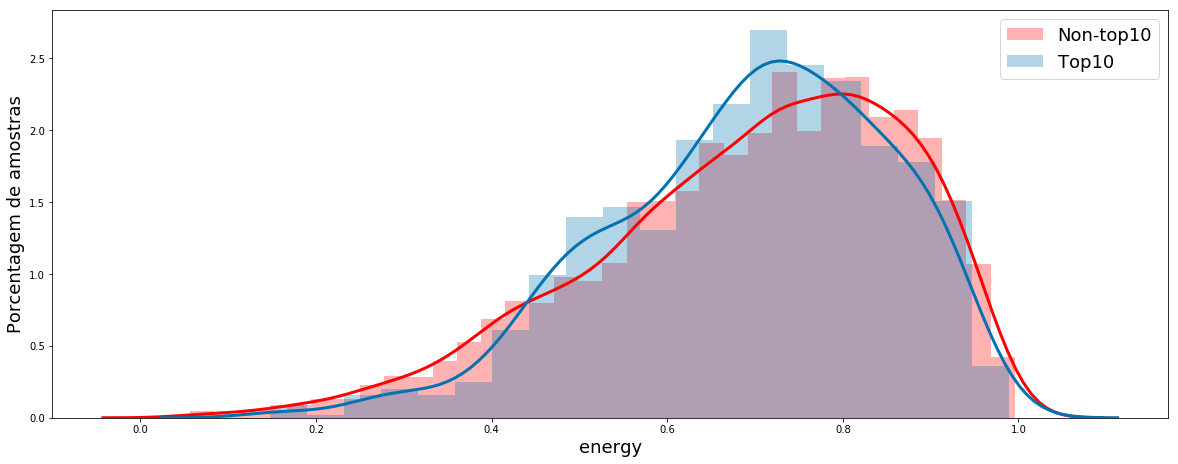

Diferença observada entre as médias de energy: 4.7947474390519496e-05


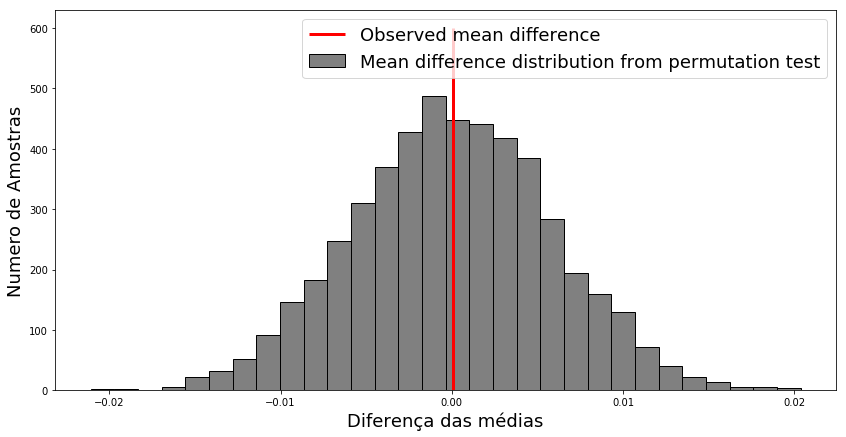

P-valor do teste: 0.499


In [25]:
permutation_test_energy = permutation_test_for_feature('energy')
results.append(permutation_test_energy)

Como podemos observar no plot, o valor observado ficou ao centro da distribuição da permutação. O p-valor confirma que não podemos rejeitar H0.

## Teste de Hipótese - Danceability

### H0: na população, a distribuição do atributo "danceability" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

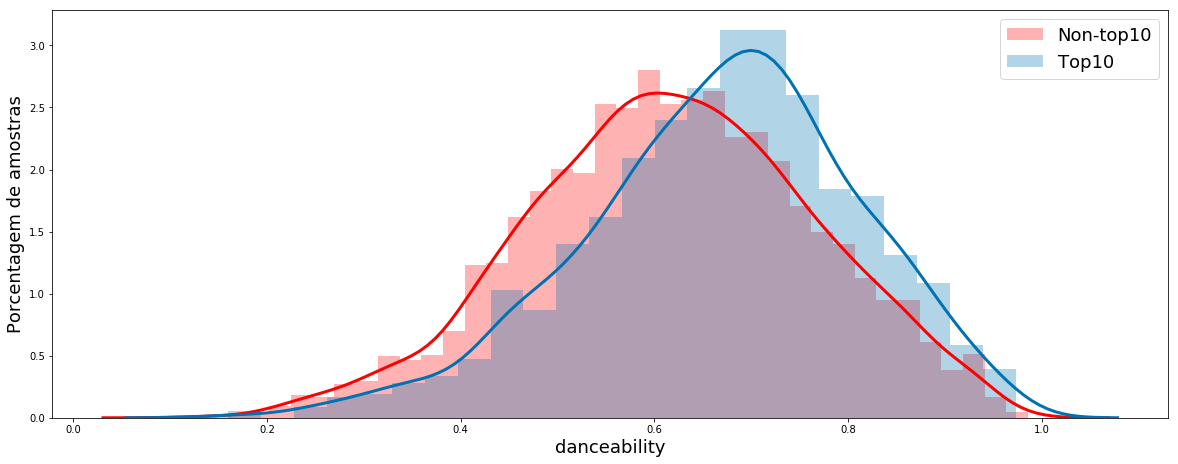

Diferença observada entre as médias de danceability: 0.05204700745559354


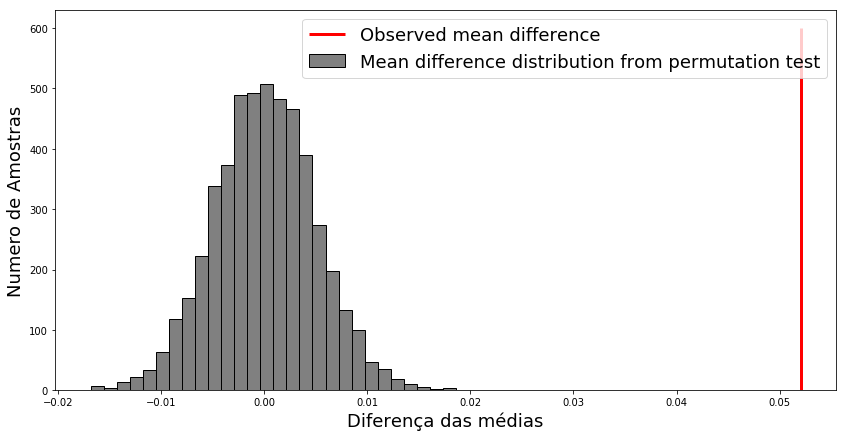

P-valor do teste: 0.0


In [26]:
results.append(permutation_test_for_feature('danceability'))

Parece que a diferença observada não pode ser explicada pelo acaso! P-valor 0. Portanto rejeitamos H0.

Ou seja, a distribuição de "danceability" não é uniforme para músicas que já atingiram o top 10 e músicas que não atingiram.

## Teste de Hipótese - Liveness

### H0: na população, a distribuição do atributo "liveness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

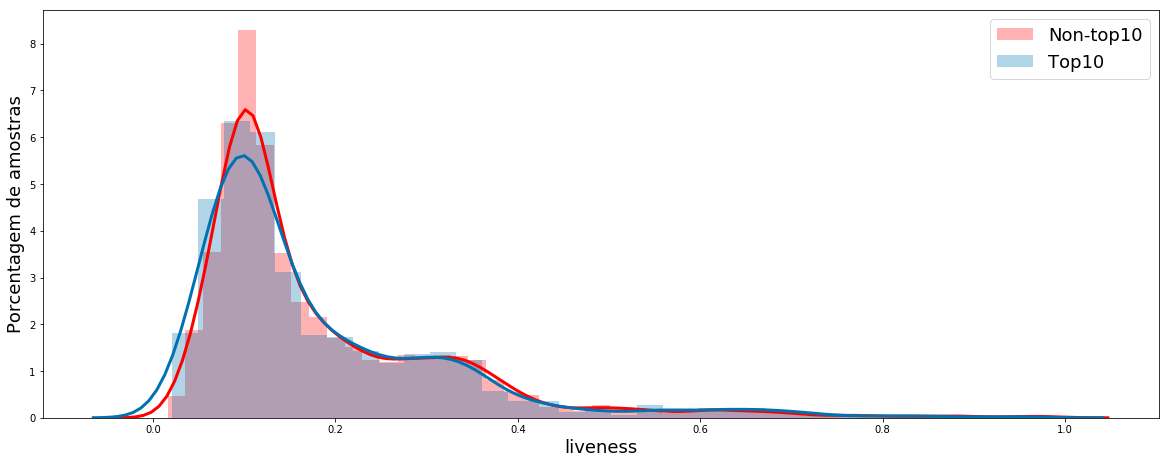

Diferença observada entre as médias de liveness: -0.0054043906533058905


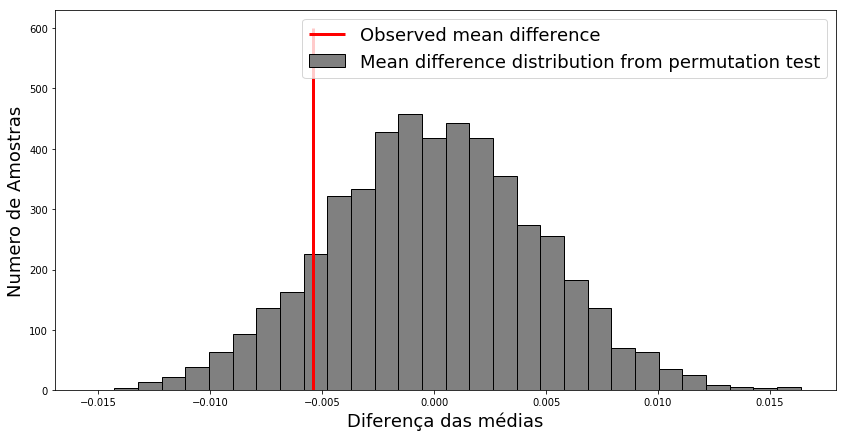

P-valor do teste: 0.1226


In [27]:
results.append(permutation_test_for_feature('liveness'))

Nesse caso, não podemos rejeitar H0, visto que o p-valor é maior que o limiar de 0.05.

## Teste de Hipótese - Tempo

### H0: na população, a distribuição do atributo "tempo" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

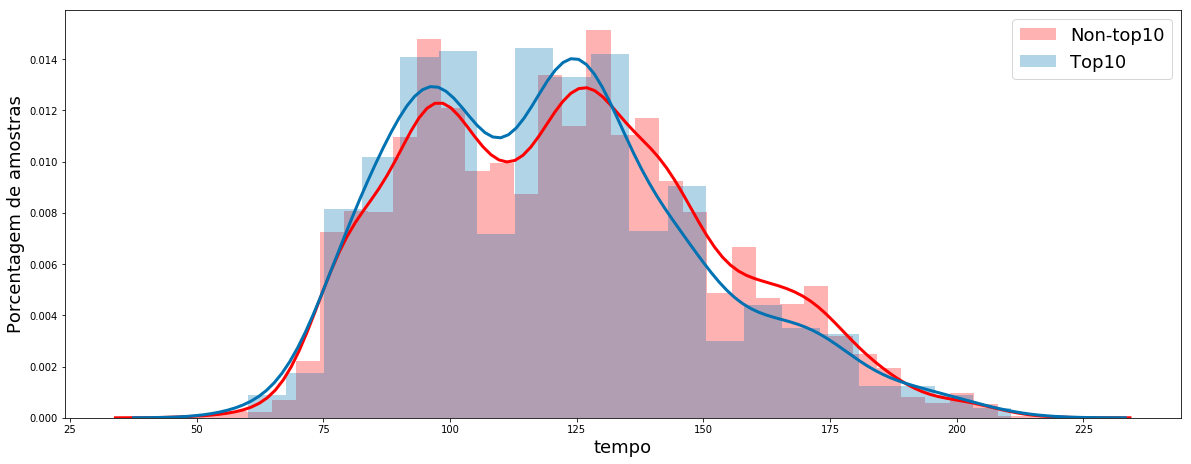

Diferença observada entre as médias de tempo: -2.905214779252347


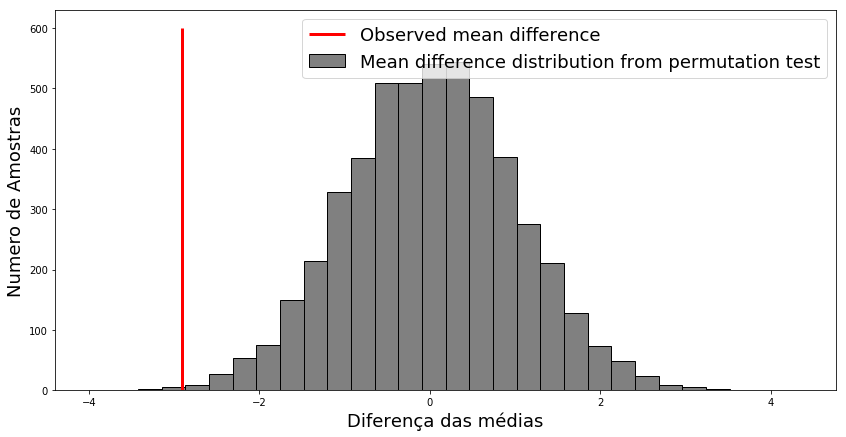

P-valor do teste: 0.0014


In [28]:
results.append(permutation_test_for_feature('tempo'))

Como o p-valor é inferior a 0.05, rejeitamos H0!

## Teste de Hipótese - Speechiness
### H0: na população, a distribuição do atributo "speechiness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

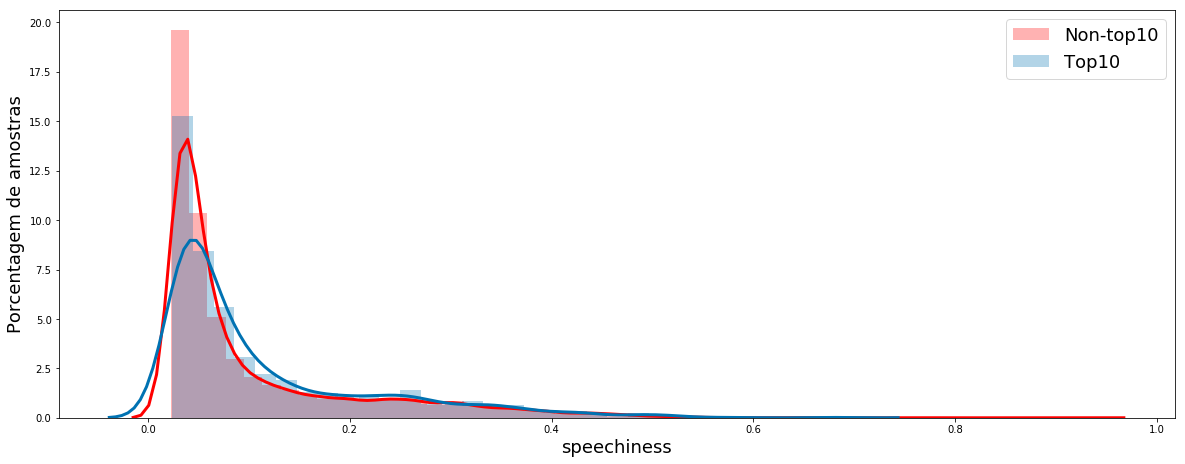

Diferença observada entre as médias de speechiness: 0.01165081222016491


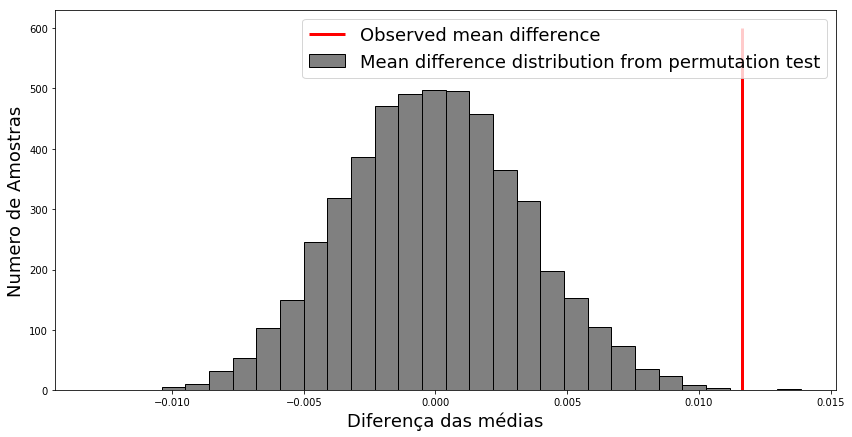

P-valor do teste: 0.0004


In [29]:
results.append(permutation_test_for_feature('speechiness'))

P valor inferior a 0.05, rejeitamos a hipótese nula.

## Teste de Hipótese - Acousticness
### H0: na população, a distribuição do atributo "acousticness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

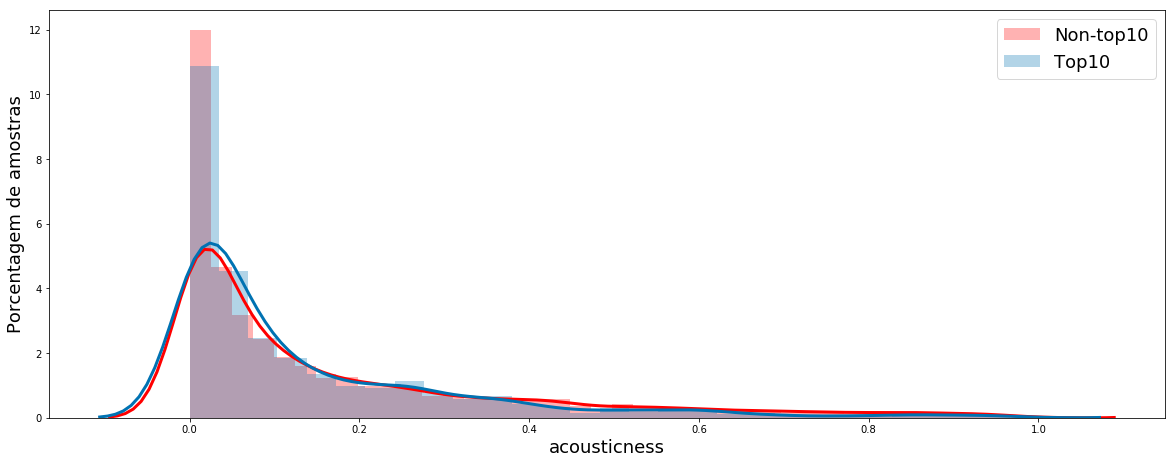

Diferença observada entre as médias de acousticness: -0.033229565586830934


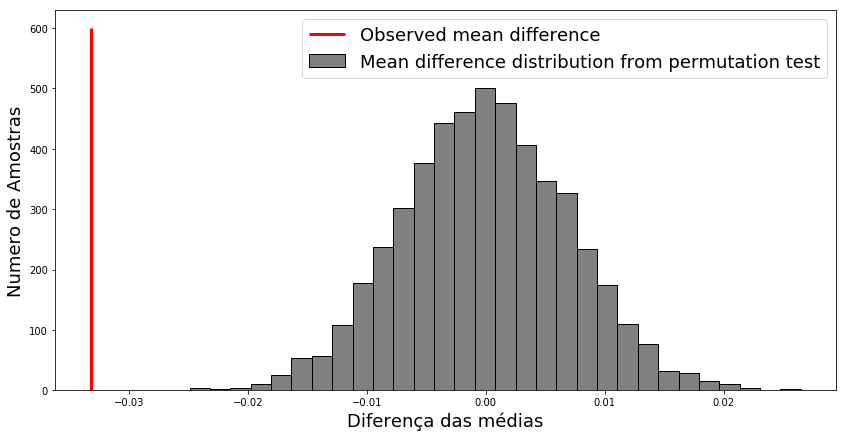

P-valor do teste: 0.0


In [30]:
results.append(permutation_test_for_feature('acousticness'))

P valor também é inferior ao limiar de 0.05! Rejeitamos H0.

## Teste de Hipótese - Instrumentalness
### H0: na população, a distribuição do atributo "instrumentalness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

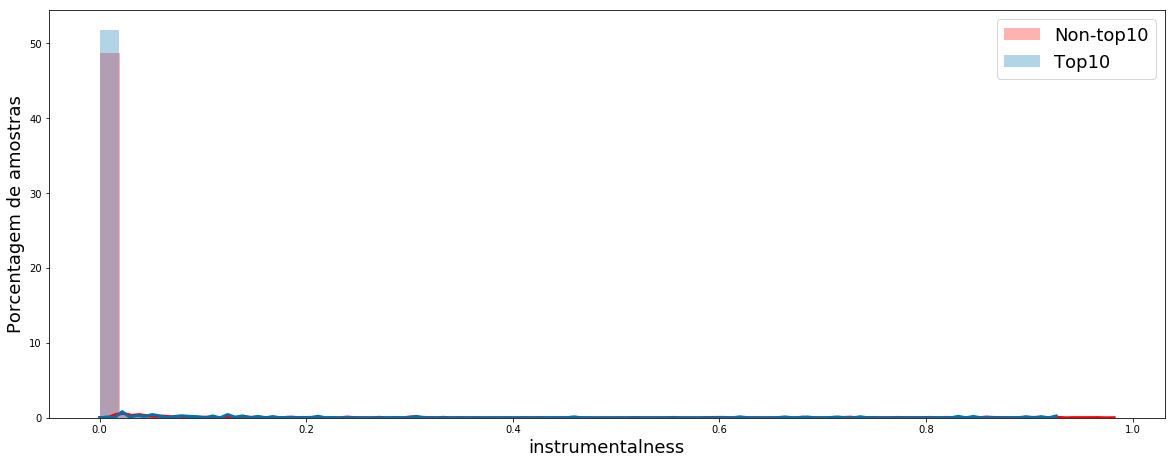

Diferença observada entre as médias de instrumentalness: -0.0027443378667299494


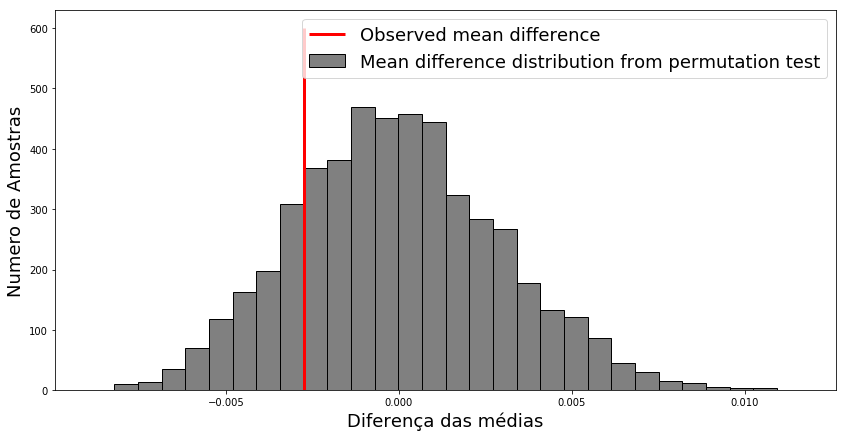

P-valor do teste: 0.1846


In [31]:
results.append(permutation_test_for_feature('instrumentalness'))

Agora temos outra feature que não conseguimos rejeitar H0.

## Teste de Hipótese - TimeSignature
### H0: na população, a distribuição do atributo "time_signature" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

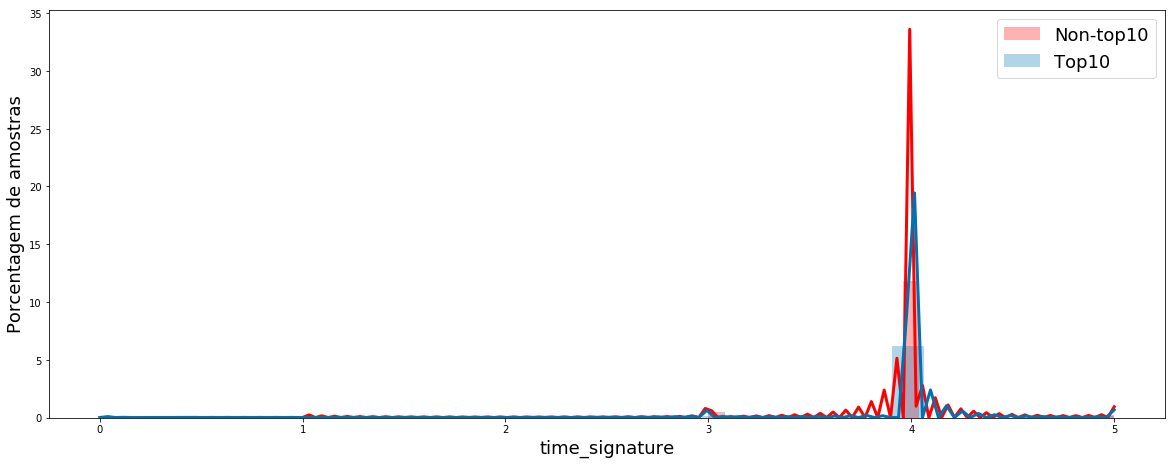

Diferença observada entre as médias de time_signature: 0.023552517425605046


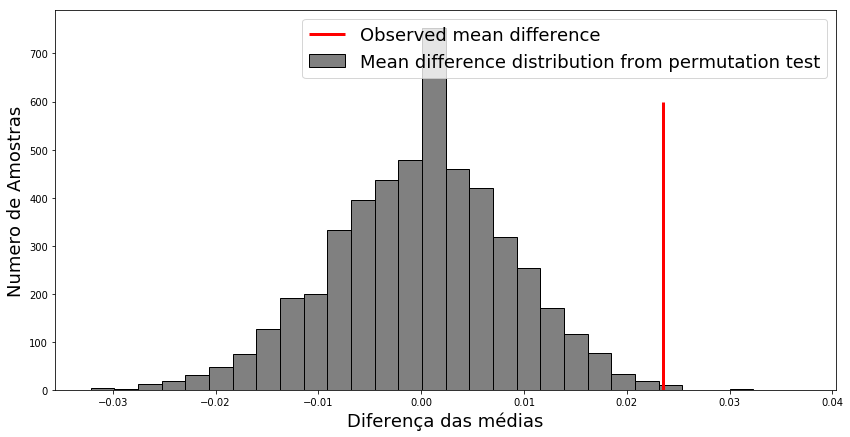

P-valor do teste: 0.0018


In [32]:
results.append(permutation_test_for_feature('time_signature'))

## Teste de Hipótese - Key
### H0: na população, a distribuição do atributo "key" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

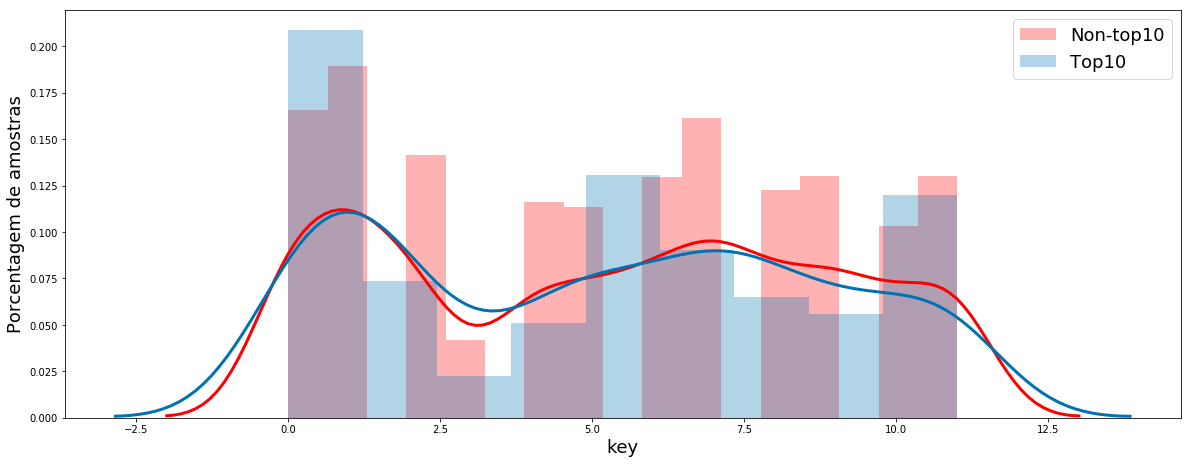

Diferença observada entre as médias de key: -0.17472106079775696


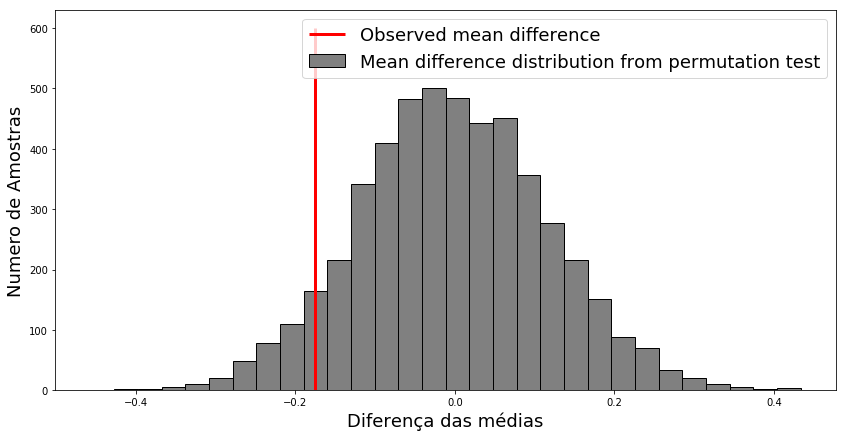

P-valor do teste: 0.0716


In [33]:
results.append(permutation_test_for_feature('key'))

## Teste de Hipótese - Loudness
### H0: na população, a distribuição do atributo "loudness" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

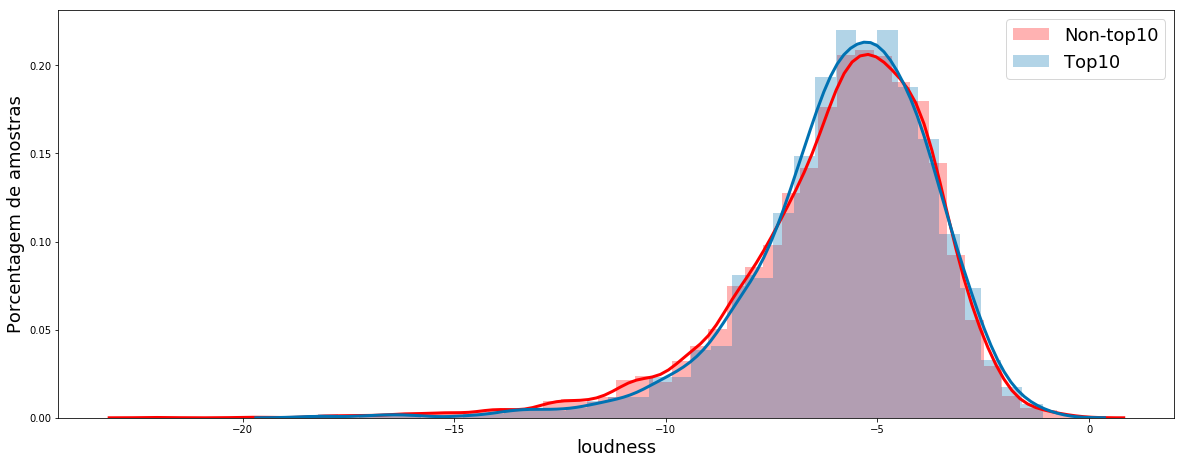

Diferença observada entre as médias de loudness: 0.17502767913462236


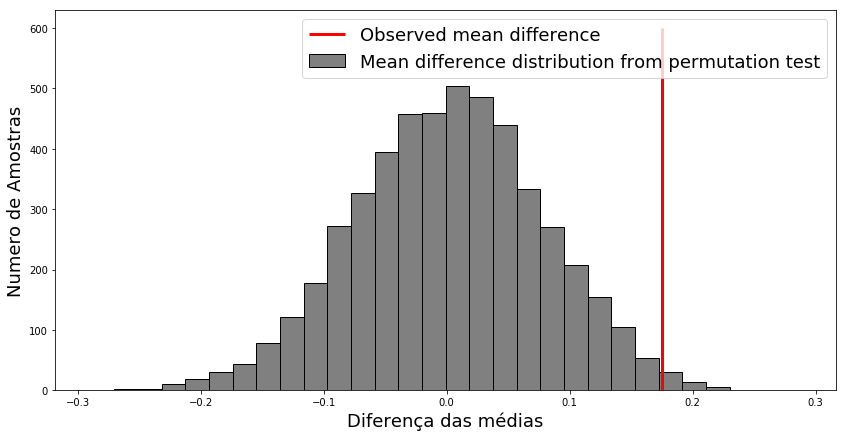

P-valor do teste: 0.01


In [34]:
results.append(permutation_test_for_feature('loudness'))

## Teste de Hipótese - Valence
### H0: na população, a distribuição do atributo "valence" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

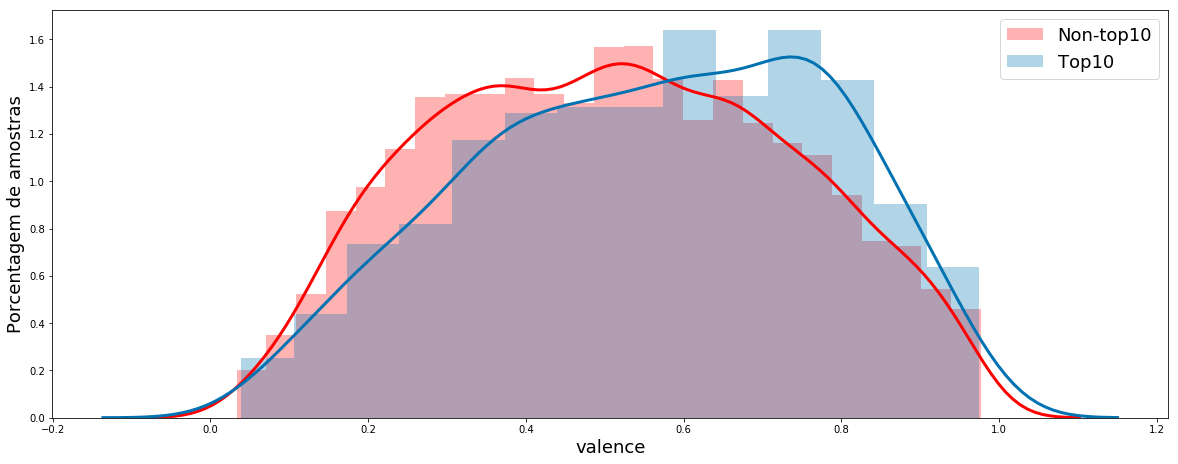

Diferença observada entre as médias de valence: 0.04999590087664185


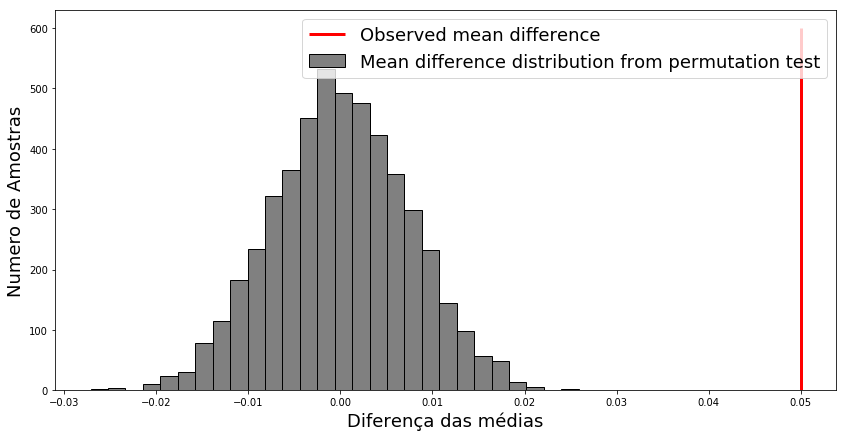

P-valor do teste: 0.0


In [35]:
results.append(permutation_test_for_feature('valence'))

## Teste de Hipótese - Mode
### H0: na população, a distribuição do atributo "mode" é igual para músicas que já atingiram o top 10 e músicas que nunca atingiram o top 10. A diferença nas amostras pode ser explicada pelo acaso.

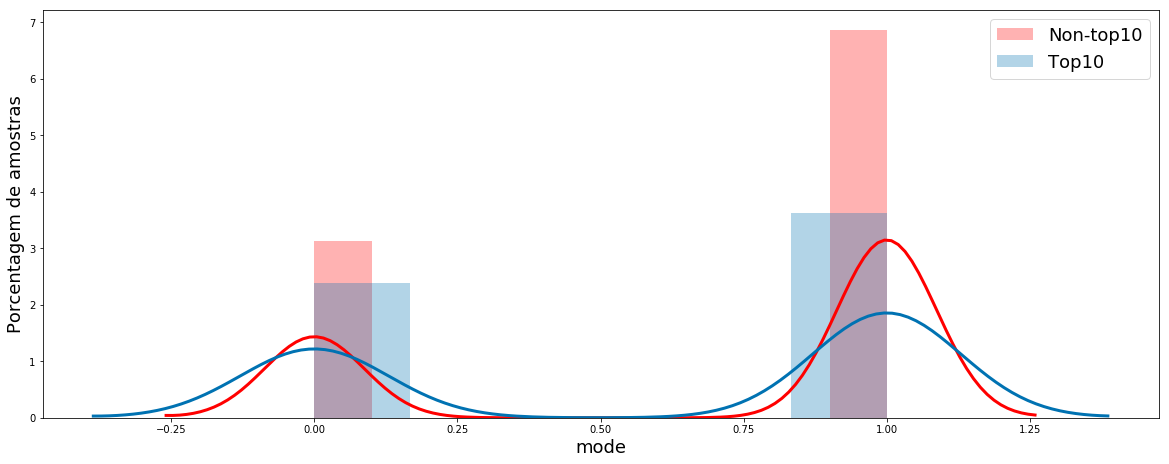

Diferença observada entre as médias de mode: -0.08328548400502767


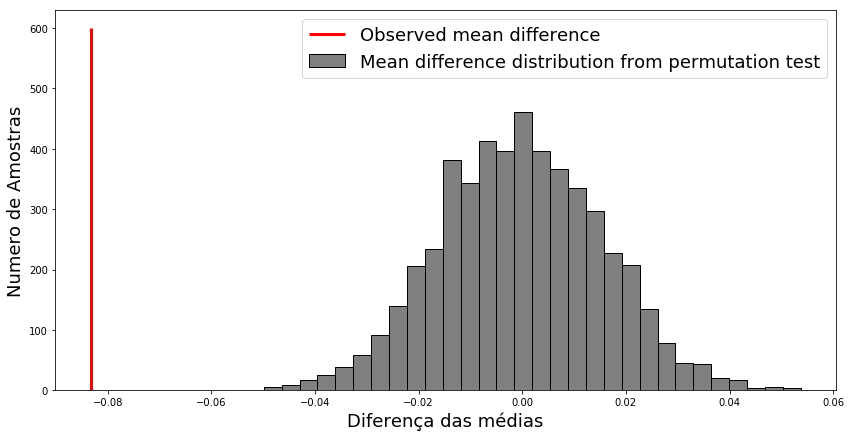

P-valor do teste: 0.0


In [36]:
results.append(permutation_test_for_feature('mode'))

Temos uma feature discreta, que só assume valores 0 ou 1.

Para **mode**, o p-valor também é inferior a 0.05, portanto também conseguimos rejeitar H0.

Depois de avaliar tudo isso, podemos construir uma tabela, sumarizando o resultado dos nossos testes de hipóteses.

In [37]:
results

[('energy', 4.7947474390519496e-05, 0.499, False),
 ('danceability', 0.05204700745559354, 0.0, True),
 ('liveness', -0.0054043906533058905, 0.1226, False),
 ('tempo', -2.905214779252347, 0.0014, True),
 ('speechiness', 0.01165081222016491, 0.0004, True),
 ('acousticness', -0.033229565586830934, 0.0, True),
 ('instrumentalness', -0.0027443378667299494, 0.1846, False),
 ('time_signature', 0.023552517425605046, 0.0018, True),
 ('key', -0.17472106079775696, 0.0716, False),
 ('loudness', 0.17502767913462236, 0.01, True),
 ('valence', 0.04999590087664185, 0.0, True),
 ('mode', -0.08328548400502767, 0.0, True)]

In [38]:
result_table = pd.DataFrame(results, columns=["Feature", "Observed Mean Difference", "P-Value", "Rejected H0"])
result_table

,Feature,Observed Mean Difference,P-Value,Rejected H0
0,energy,0.000048,0.4990,False
1,danceability,0.052047,0.0000,True
2,liveness,-0.005404,0.1226,False
3,tempo,-2.905215,0.0014,True
4,speechiness,0.011651,0.0004,True
5,acousticness,-0.033230,0.0000,True
6,instrumentalness,-0.002744,0.1846,False
7,time_signature,0.023553,0.0018,True
8,key,-0.174721,0.0716,False
9,loudness,0.175028,0.0100,True


Como podemos observar, para a maioria dos atributos conseguimos rejeitar a H0 comum.
Com isso, conseguimos responder a pergunta 2:

_**Existem características "padrão" nas músicas que atingem o topo do top100?**_

Resposta: SIM. As características "padrão" dessas músicas são as features nas quais conseguimos rejeitar H0, e o "padrão" é a diferença observada entre o grupo do top10 e o grupo que não atinge o top10.

Podemos filtrar os atributos usando um one-liner:

In [39]:
result_table[result_table["Rejected H0"]]

,Feature,Observed Mean Difference,P-Value,Rejected H0
1,danceability,0.052047,0.0000,True
3,tempo,-2.905215,0.0014,True
4,speechiness,0.011651,0.0004,True
5,acousticness,-0.033230,0.0000,True
7,time_signature,0.023553,0.0018,True
9,loudness,0.175028,0.0100,True
10,valence,0.049996,0.0000,True
11,mode,-0.083285,0.0000,True


Com isso, poderíamos ter um ponto de partida para utilização de ML.